In [ ]:
%pip install servicestack



import datetime
import decimal
from marshmallow.fields import *
from servicestack import *
from typing import *
from dataclasses import dataclass, field
from dataclasses_json import dataclass_json, LetterCase, Undefined, config
from enum import Enum, IntEnum


@dataclass_json(letter_case=LetterCase.CAMEL, undefined=Undefined.EXCLUDE)
@dataclass
class Invoices:
    invoice_id: int = 0
    customer_id: int = 0
    invoice_date: datetime.datetime = datetime.datetime(1, 1, 1)
    billing_address: Optional[str] = None
    billing_city: Optional[str] = None
    billing_state: Optional[str] = None
    billing_country: Optional[str] = None
    billing_postal_code: Optional[str] = None
    total: Decimal = decimal.Decimal(0)


# @Route("/invoices", "GET")
# @Route("/invoices/{InvoiceId}", "GET")
@dataclass_json(letter_case=LetterCase.CAMEL, undefined=Undefined.EXCLUDE)
@dataclass
class QueryInvoices(QueryDb[Invoices], IReturn[QueryResponse[Invoices]], IGet):
    invoice_id: Optional[int] = None



from IPython.core.display import display, HTML

client = JsonServiceClient("https://chinook.netcore.io")


In [2]:
response = client.send(QueryInvoices())


In [ ]:
%pip install pandas
%pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.DataFrame(response.results)

In [6]:
df['year'] = pd.DatetimeIndex(df['invoice_date']).year

# Sales by year
Looking at the sales across 5 years of data we have small dips in 2009 and 2013.

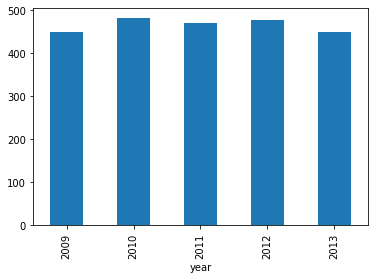

In [7]:
df.groupby('year')['total'].sum().astype(float).plot.bar();

# Sales by country and year
Looking more closely at our breakdown of revenue by country, the USA remains our biggest market, closely followed by Canada, Brazil, France and Germany.

<AxesSubplot:xlabel='billing_country'>

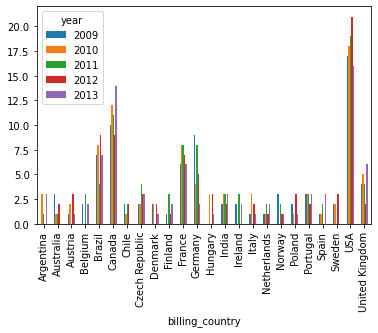

In [8]:
df.groupby('year').billing_country.value_counts().unstack(0).plot.bar()

## Sales in top 5 countries
Looking more closely at these top performing countries we can see country specific factors have impacted sales creating no trend consistently across all 5 countries.

<AxesSubplot:xlabel='billing_country'>

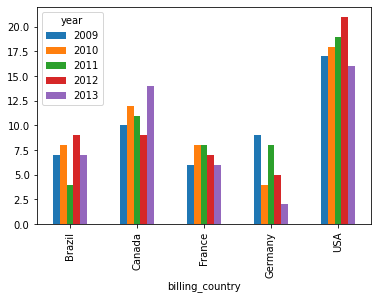

In [9]:
import numpy as np
import functools
def conjunction(*conditions):
    return functools.reduce(np.logical_or, conditions)


is_usa = df.billing_country == 'USA' 
is_can = df.billing_country == 'Canada' 
is_bra = df.billing_country == 'Brazil'
is_fra = df.billing_country == 'France'
is_ger = df.billing_country == 'Germany'
df[conjunction(is_usa,is_can,is_bra,is_fra,is_ger)].groupby('year').billing_country.value_counts().unstack(0).plot.bar()